In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import cv2
import json
from tqdm.auto import tqdm
from PIL import Image

In [5]:
import os

if os.path.exists('/content/drive'):
    print('Google Drive is mounted.')
else:
    print('Google Drive is not mounted. Please mount it to proceed.')

Google Drive is mounted.


In [6]:
file_path = 'drive/MyDrive/ScrapedWikiArtImages/img/full'
sample_files = os.listdir(file_path)[:5]
sample_files

['b8aed6d61c4e3b8fa20512c04ff98fc1bef4ec24.jpg',
 '995b2066eb686586049fcb1bc19721e7b3773179.jpg',
 '8a11bc996b61cad79491263a0ec188c0be20c6b2.jpg',
 '34ba16b603a3d56151469054fee4b1b8b5e06739.jpg',
 '9c388bb0a402a3fec366b7c15c530899dc40c14b.jpg']

In [7]:
num_files = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])
print(f"Number of files: {num_files}")

Number of files: 48304


In [37]:
import json
import pandas as pd
import re # Import the re module for regular expressions
from tqdm.auto import tqdm # Import tqdm for progress bar

file_path = 'drive/MyDrive/ScrapedWikiArtImages/canvas_metadata.json'
metadata_list = [] # Initialize as empty list

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Implement the line-by-line parsing fallback directly
    print("Initiating robust line-by-line JSON parsing...")

    parsed_metadata_list = []
    lines = content.split('\n')
    for i, line in enumerate(tqdm(lines, desc="Parsing lines")):
        stripped_line = line.strip()

        # Skip empty lines or lines that are just JSON array delimiters
        if not stripped_line or stripped_line == '[' or stripped_line == ']':
            continue

        # Remove trailing comma if present, as each line should be a self-contained JSON object
        # before parsing, and the overall structure is a list of objects.
        # This is a common pattern when dealing with concatenated JSON objects.
        if stripped_line.endswith(','):
            stripped_line = stripped_line[:-1]

        try:
            # Each line is expected to be a JSON object, so parse it directly
            json_object = json.loads(stripped_line)
            parsed_metadata_list.append(json_object)
        except json.JSONDecodeError as line_e:
            # This means a specific line itself is malformed or not a complete JSON object
            print(f"Warning: Could not parse line {i+1}. Error: {line_e}. Line content: '{stripped_line[:100]}'...")

    metadata_list = parsed_metadata_list

except FileNotFoundError:
    print(f"Error: El archivo no fue encontrado en {file_path}")
except Exception as e:
    print(f"Un error inesperado ocurrió: {e}")

df = pd.DataFrame(metadata_list)
print(f'Metadata file shape:\n{df.shape}')
print(f'Columns:\n{list(df.columns)}')
df.head()

Initiating robust line-by-line JSON parsing...


Parsing lines:   0%|          | 0/47910 [00:00<?, ?it/s]

Metadata file shape:
(47909, 21)
Columns:
['Id', 'URL', 'Title', 'OriginalTitle', 'Author', 'AuthorLink', 'Date', 'Styles', 'Series', 'SeriesLink', 'Genre', 'GenreLink', 'Media', 'Location', 'Dimensions', 'Description', 'WikiDescription', 'WikiLink', 'Tags', 'image_urls', 'images']


,Id,URL,Title,OriginalTitle,Author,AuthorLink,Date,Styles,Series,SeriesLink,...,GenreLink,Media,Location,Dimensions,Description,WikiDescription,WikiLink,Tags,image_urls,images
0,0,https://www.wikiart.org/en/sean-scully/beach,Beach,None,Sean Scully,wikiart.org/en/sean-scully,None,"[[Color Field Painting, wikiart.org/en/paintin...",None,None,...,wikiart.org/en/paintings-by-genre/abstract,[],None,None,None,None,None,[Turquoise],[https://uploads5.wikiart.org/images/sean-scul...,[{'url': 'https://uploads5.wikiart.org/images/...
1,1,https://www.wikiart.org/en/amin-aghaei/at-the-...,At the Karun Bank,لب کارون,Amin Aghaei,wikiart.org/en/amin-aghaei,2012,"[[Magic Realism, wikiart.org/en/paintings-by-s...",None,None,...,wikiart.org/en/paintings-by-genre/figurative,[acrylic],None,120 x 150 cm,None,None,None,[],[https://uploads5.wikiart.org/00290/images/ami...,[{'url': 'https://uploads5.wikiart.org/00290/i...
2,2,https://www.wikiart.org/en/manuela-sambo/il-ba...,Il Bambolo,None,Manuela Sambo,wikiart.org/en/manuela-sambo,2016,"[[Expressionism, wikiart.org/en/paintings-by-s...",None,None,...,wikiart.org/en/paintings-by-genre/nude-paintin...,[],None,100 x 100 cm,None,None,None,"[Lady, Cheek]",[https://uploads2.wikiart.org/00138/images/man...,[{'url': 'https://uploads2.wikiart.org/00138/i...
3,3,https://www.wikiart.org/en/nyoman-masriadi/sti...,Still Hot,None,Nyoman Masriadi,wikiart.org/en/nyoman-masriadi,None,"[[Neo-Expressionism, wikiart.org/en/paintings-...",None,None,...,wikiart.org/en/paintings-by-genre/genre-painting,[],None,None,None,None,None,[Hand],[https://uploads5.wikiart.org/images/nyoman-ma...,[{'url': 'https://uploads5.wikiart.org/images/...
4,4,https://www.wikiart.org/en/kent-monkman/leda-a...,Leda and the Swan,None,Kent Monkman,wikiart.org/en/kent-monkman,None,"[[Postcolonial art, wikiart.org/en/paintings-b...",None,None,...,wikiart.org/en/paintings-by-genre/figurative,[],None,None,None,None,None,"[Nature, Naturallandscape, Stream, Watercourse...",[https://uploads6.wikiart.org/00309/images/ken...,[{'url': 'https://uploads6.wikiart.org/00309/i...


In [16]:
# --- Helper function to safely extract image info ---
def get_image_info(image_data_list):
    """
    Extracts path and checksum from the first valid entry in the image_data_list.
    Each item in image_data_list is expected to be a dictionary.
    """
    if isinstance(image_data_list, list) and len(image_data_list) > 0:
        # Assuming we are interested in the first image entry if multiple exist
        first_entry = image_data_list[0]
        if isinstance(first_entry, dict):
            path = first_entry.get('path')
            checksum = first_entry.get('checksum')
            status = first_entry.get('status')
            # Only consider if status is 'downloaded' and path/checksum are present
            if status == 'downloaded' and path and checksum:
                return path, checksum
    return None, None

In [17]:
# --- Main Duplicate Checking Function ---
def find_duplicate_images(df, image_column_name='images'):
    """
    Finds duplicate images in a DataFrame based on checksums and file paths.

    Args:
        df (pd.DataFrame): The DataFrame containing image metadata.
        image_column_name (str): The name of the column holding the image data list.
                                 (e.g., the 'images' column in your case)
    Returns:
        tuple: (duplicates_by_checksum, duplicates_by_path)
               Each is a dictionary where keys are checksums/paths and
               values are lists of DataFrame indices.
    """
    if image_column_name not in df.columns:
        print(f"Error: Column '{image_column_name}' not found in DataFrame.")
        return {}, {}

    checksum_map = defaultdict(list)
    path_map = defaultdict(list)
    processed_indices = [] # To keep track of rows we could process

    print(f"Processing {len(df)} rows to find duplicates...")

    for index, row in tqdm(df.iterrows(), total=len(df), desc="Checking images"):
        image_data_list = row[image_column_name]
        path, checksum = get_image_info(image_data_list)

        if path and checksum:
            processed_indices.append(index)
            checksum_map[checksum].append(index)

            # For path_map, we use the relative path from metadata directly
            path_map[path].append(index)
        # else: # Optional: log if some rows don't have valid image data
            # print(f"Warning: Row at index {index} has no valid 'downloaded' image data with path and checksum.")


    print(f"\nProcessed {len(processed_indices)} rows with valid image data.")

    duplicates_by_checksum = {cs: indices for cs, indices in checksum_map.items() if len(indices) > 1}
    duplicates_by_path = {p: indices for p, indices in path_map.items() if len(indices) > 1}

    return duplicates_by_checksum, duplicates_by_path

# Task
Investigate and pinpoint the malformed section within `canvas_metadata.json` around line 47910 column 888 to understand the `Expecting ',' delimiter` error.

## Investigate the malformed JSON content

### Subtask:
The `canvas_metadata.json` file is consistently failing to load due to a `JSONDecodeError` at a specific line and column (`line 47910 column 888`, "Expecting ',' delimiter"). This step involves writing code to read the file content, pinpoint the problematic section around this line, and print it, potentially allowing for a more precise understanding of the malformation.


**Reasoning**:
To pinpoint the JSON parsing error, I need to extract and display the problematic line and the surrounding characters based on the given line and column number from the error message. The `content` variable already holds the full JSON content, so I will split it into lines and then extract the relevant section.



In [11]:
error_line_number = 47910
error_column_number = 888

# Split the content into lines
lines = content.split('\n')

# Adjust for 0-based indexing
actual_line_index = error_line_number - 1
actual_column_index = error_column_number - 1

problematic_line = ""
if 0 <= actual_line_index < len(lines):
    problematic_line = lines[actual_line_index]
    print(f"--- Problematic Line {error_line_number} ---")
    print(problematic_line)

    # Extract a substring around the problematic column
    start_index = max(0, actual_column_index - 50)
    end_index = min(len(problematic_line), actual_column_index + 50)

    extracted_segment = problematic_line[start_index:end_index]

    print(f"\n--- Segment around Column {error_column_number} ---")
    print(f"Character at column {error_column_number} (0-indexed {actual_column_index}): '{problematic_line[actual_column_index]}'")
    print(extracted_segment)
    print(" " * (actual_column_index - start_index) + "^") # Point to the exact error location
else:
    print(f"Error: Line {error_line_number} is out of bounds.")

--- Problematic Line 47910 ---
{"Id": 47906, "URL": "https://www.wikiart.org/en/gosta-adrian-nilsson/gul-figur-1917", "Title": "Gul figur", "OriginalTitle": null, "Author": "Gosta Adrian-Nilsson", "AuthorLink": "wikiart.org/en/gosta-adrian-nilsson", "Date": "1917", "Styles": [["Cubo-Futurism", "wikiart.org/en/paintings-by-style/cubo-futurism"]], "Series": null, "SeriesLink": null, "Genre": "abstract", "GenreLink": "wikiart.org/en/paintings-by-genre/abstract", "Media": [], "Location": null, "Dimensions": null, "Description": null, "WikiDescription": null, "WikiLink": null, "Tags": [], "image_urls": ["https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg"], "images": [{"url": "https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg", "path": "full/b49a6d2cd49d9ae608ce9aae8573bc6d47470599.jpg", "checksum": "4c48f753eb6476e2dc950d40a66a6d7f", "status": "downloaded"}]}

--- Segment around Column 888 ---


IndexError: string index out of range

**Reasoning**:
The previous attempt to pinpoint the error failed due to an `IndexError`, which is unexpected given the reported string length and index. To address this, I will modify the code to include debugging print statements for the actual length of the `problematic_line` and the `actual_column_index` right before the potentially problematic access. Additionally, I'll add defensive checks to ensure `actual_column_index` is within the bounds of `problematic_line` before attempting to access a character at that position. This will help clarify if the line is indeed shorter than expected or if there's another subtle issue.



In [12]:
error_line_number = 47910
error_column_number = 888

# Split the content into lines
lines = content.split('\n')

# Adjust for 0-based indexing
actual_line_index = error_line_number - 1
actual_column_index = error_column_number - 1

problematic_line = ""
if 0 <= actual_line_index < len(lines):
    problematic_line = lines[actual_line_index]
    print(f"--- Problematic Line {error_line_number} (Length: {len(problematic_line)}) ---")
    print(problematic_line)
    print(f"Debug: Length of problematic_line = {len(problematic_line)}") # Debug statement
    print(f"Debug: Actual column index to access = {actual_column_index}") # Debug statement

    char_at_error_loc = None
    if 0 <= actual_column_index < len(problematic_line):
        char_at_error_loc = problematic_line[actual_column_index]
        print(f"Character at column {error_column_number} (0-indexed {actual_column_index}): '{char_at_error_loc}'")
    else:
        print(f"Warning: Reported column {error_column_number} (0-indexed {actual_column_index}) is OUT OF BOUNDS for problematic line (length {len(problematic_line)}).")

    # Extract a substring around the problematic column for context
    # This logic aims to provide a relevant segment even if actual_column_index is out of bounds.
    start_index = max(0, min(actual_column_index - 50, len(problematic_line) - 50))
    start_index = max(0, start_index) # Ensure start_index is not negative

    end_index = min(len(problematic_line), actual_column_index + 50)

    # If the line is very short, adjust start_index to get a segment from the beginning
    if len(problematic_line) > 0 and end_index - start_index < 10:
        start_index = max(0, end_index - 50)

    extracted_segment = problematic_line[start_index:end_index]

    print(f"\n--- Segment around Column {error_column_number} (0-indexed {actual_column_index}) ---")
    if extracted_segment:
        print(extracted_segment)
        # Point to the error location within the extracted segment if possible
        pointer_pos_in_segment = actual_column_index - start_index
        if 0 <= pointer_pos_in_segment < len(extracted_segment):
            print(" " * pointer_pos_in_segment + "^")
        elif actual_column_index >= len(problematic_line) and len(problematic_line) > 0:
            # If error is past end of line, point to the very end of the line/segment
            print(" " * (len(extracted_segment) - 1) + "^ (End of line)")
        elif len(problematic_line) == 0:
            print("Line is empty.")
        else:
            print("Cannot precisely point to error location within segment (error location far outside segment).")
    else:
        print("No segment could be extracted (line might be empty or error location too far).")

else:
    print(f"Error: Line {error_line_number} is out of bounds.")

--- Problematic Line 47910 (Length: 887) ---
{"Id": 47906, "URL": "https://www.wikiart.org/en/gosta-adrian-nilsson/gul-figur-1917", "Title": "Gul figur", "OriginalTitle": null, "Author": "Gosta Adrian-Nilsson", "AuthorLink": "wikiart.org/en/gosta-adrian-nilsson", "Date": "1917", "Styles": [["Cubo-Futurism", "wikiart.org/en/paintings-by-style/cubo-futurism"]], "Series": null, "SeriesLink": null, "Genre": "abstract", "GenreLink": "wikiart.org/en/paintings-by-genre/abstract", "Media": [], "Location": null, "Dimensions": null, "Description": null, "WikiDescription": null, "WikiLink": null, "Tags": [], "image_urls": ["https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg"], "images": [{"url": "https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg", "path": "full/b49a6d2cd49d9ae608ce9aae8573bc6d47470599.jpg", "checksum": "4c48f753eb6476e2dc950d40a66a6d7f", "status": "downloaded"}]}
Debug: Length of problematic_line = 887
Debug: Actual column index 

The previous analysis reveals that the `JSONDecodeError` at `line 47910, column 888` occurs precisely at the very end of the line. The line has a length of 887 characters, and the reported error column, when adjusted for 0-based indexing (887), points to the position *immediately after* the last character of the line.

The problematic line content is:
```json
{"Id": 47906, "URL": "https://www.wikiart.org/en/gosta-adrian-nilsson/gul-figur-1917", "Title": "Gul figur", "OriginalTitle": null, "Author": "Gosta Adrian-Nilsson", "AuthorLink": "wikiart.org/en/gosta-adrian-nilsson", "Date": "1917", "Styles": [["Cubo-Futurism", "wikiart.org/en/paintings-by-style/cubo-futurism"]], "Series": null, "SeriesLink": null, "Genre": "abstract", "GenreLink": "wikiart.org/en/paintings-by-genre/abstract", "Media": [], "Location": null, "Dimensions": null, "Description": null, "WikiDescription": null, "WikiLink": null, "Tags": [], "image_urls": ["https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg"], "images": [{"url": "https://uploads5.wikiart.org/images/gosta-adrian-nilsson/gul-figur-1917.jpg", "path": "full/b49a6d2cd49d9ae608ce9aae8573bc6d47470599.jpg", "checksum": "4c48f753eb6476e2dc950d40a66a6d7f", "status": "downloaded"}]}
```
The error message "Expecting ',' delimiter" at this position indicates that the JSON parser, which expects a list of objects, found a complete JSON object but did not find the comma that should separate it from the next object in the array. This suggests one of two scenarios:
1. **The JSON array is incomplete or truncated:** This specific object might be the last valid object in the array, but the overall array is not properly closed with a `]` character, or there are unexpected characters after this line that prevent proper parsing.
2. **A subsequent JSON object is missing or malformed:** The parser expected another object to follow this one, separated by a comma, but found the end of the line instead.

Given that the entire `canvas_metadata.json` file is failing to load, it is highly probable that the file is either truncated or contains an improperly formatted section, leading to this `JSONDecodeError` where a delimiter for a new object is expected but not found. This effectively pinpoints the malformation to the end of line 47910, where a JSON array element ends without a subsequent comma (if more elements follow) or a closing bracket (if it's the last element).


## Implement robust JSON loading with error handling

### Subtask:
Successfully load the `canvas_metadata.json` file into a pandas DataFrame, addressing the previously identified `JSONDecodeError` by inserting a missing comma. If the direct fix is insufficient, implement a line-by-line parsing fallback.


**Reasoning**:
The previous attempt to load the JSON failed due to a missing comma at a specific character index. This step aims to fix the `JSONDecodeError` by inserting a comma at the identified character position and then attempting to load the JSON. If this direct fix isn't sufficient, a robust line-by-line parsing fallback will be implemented to ensure as much metadata as possible is loaded.



In [13]:
import json
import pandas as pd
import re # Import the re module for regular expressions

file_path = 'drive/MyDrive/ScrapedWikiArtImages/canvas_metadata.json'
metadata_list = [] # Initialize as empty list

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Identified error character index from previous output (char 48875120)
    char_index_error = 48875120

    # Attempt to fix by inserting a comma at the identified index
    fixed_content = content[:char_index_error] + ',' + content[char_index_error:]

    print(f"Attempting to load JSON after inserting comma at character index {char_index_error}...")
    try:
        metadata_list = json.loads(fixed_content)
        print("Successfully loaded JSON after inserting a comma.")
    except json.JSONDecodeError as e:
        print(f"Still encountered JSONDecodeError after comma insertion: {e}")
        print("Initiating line-by-line parsing fallback...")

        parsed_metadata_list = []
        # Splitting by '\n' to get individual lines as done before
        lines = fixed_content.split('\n') # Use fixed_content for fallback attempt
        for i, line in enumerate(tqdm(lines, desc="Parsing lines")):
            stripped_line = line.strip()

            # Skip empty lines or lines that are just JSON array delimiters
            if not stripped_line or stripped_line == '[' or stripped_line == ']':
                continue

            # Remove trailing comma if present, as each line should be a self-contained JSON object
            # before parsing, and the overall structure is a list of objects.
            # This is a common pattern when dealing with concatenated JSON objects.
            if stripped_line.endswith(','):
                stripped_line = stripped_line[:-1]

            try:
                # Each line is expected to be a JSON object, so parse it directly
                json_object = json.loads(stripped_line)
                parsed_metadata_list.append(json_object)
            except json.JSONDecodeError as line_e:
                # This means a specific line itself is malformed or not a complete JSON object
                print(f"Warning: Could not parse line {i+1}. Error: {line_e}. Line content: '{stripped_line[:100]}'...")

        metadata_list = parsed_metadata_list

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Create DataFrame from the (potentially fixed) metadata_list
df = pd.DataFrame(metadata_list)

print(f'\nMetadata file shape:\n{df.shape}')
print(f'Columns:\n{list(df.columns)}')
df.head()

Attempting to load JSON after inserting comma at character index 48875120...
Still encountered JSONDecodeError after comma insertion: Expecting value: line 47910 column 889 (char 48875121)
Initiating line-by-line parsing fallback...


Parsing lines:   0%|          | 0/47910 [00:00<?, ?it/s]


Metadata file shape:
(47909, 21)
Columns:
['Id', 'URL', 'Title', 'OriginalTitle', 'Author', 'AuthorLink', 'Date', 'Styles', 'Series', 'SeriesLink', 'Genre', 'GenreLink', 'Media', 'Location', 'Dimensions', 'Description', 'WikiDescription', 'WikiLink', 'Tags', 'image_urls', 'images']


,Id,URL,Title,OriginalTitle,Author,AuthorLink,Date,Styles,Series,SeriesLink,...,GenreLink,Media,Location,Dimensions,Description,WikiDescription,WikiLink,Tags,image_urls,images
0,0,https://www.wikiart.org/en/sean-scully/beach,Beach,None,Sean Scully,wikiart.org/en/sean-scully,None,"[[Color Field Painting, wikiart.org/en/paintin...",None,None,...,wikiart.org/en/paintings-by-genre/abstract,[],None,None,None,None,None,[Turquoise],[https://uploads5.wikiart.org/images/sean-scul...,[{'url': 'https://uploads5.wikiart.org/images/...
1,1,https://www.wikiart.org/en/amin-aghaei/at-the-...,At the Karun Bank,لب کارون,Amin Aghaei,wikiart.org/en/amin-aghaei,2012,"[[Magic Realism, wikiart.org/en/paintings-by-s...",None,None,...,wikiart.org/en/paintings-by-genre/figurative,[acrylic],None,120 x 150 cm,None,None,None,[],[https://uploads5.wikiart.org/00290/images/ami...,[{'url': 'https://uploads5.wikiart.org/00290/i...
2,2,https://www.wikiart.org/en/manuela-sambo/il-ba...,Il Bambolo,None,Manuela Sambo,wikiart.org/en/manuela-sambo,2016,"[[Expressionism, wikiart.org/en/paintings-by-s...",None,None,...,wikiart.org/en/paintings-by-genre/nude-paintin...,[],None,100 x 100 cm,None,None,None,"[Lady, Cheek]",[https://uploads2.wikiart.org/00138/images/man...,[{'url': 'https://uploads2.wikiart.org/00138/i...
3,3,https://www.wikiart.org/en/nyoman-masriadi/sti...,Still Hot,None,Nyoman Masriadi,wikiart.org/en/nyoman-masriadi,None,"[[Neo-Expressionism, wikiart.org/en/paintings-...",None,None,...,wikiart.org/en/paintings-by-genre/genre-painting,[],None,None,None,None,None,[Hand],[https://uploads5.wikiart.org/images/nyoman-ma...,[{'url': 'https://uploads5.wikiart.org/images/...
4,4,https://www.wikiart.org/en/kent-monkman/leda-a...,Leda and the Swan,None,Kent Monkman,wikiart.org/en/kent-monkman,None,"[[Postcolonial art, wikiart.org/en/paintings-b...",None,None,...,wikiart.org/en/paintings-by-genre/figurative,[],None,None,None,None,None,"[Nature, Naturallandscape, Stream, Watercourse...",[https://uploads6.wikiart.org/00309/images/ken...,[{'url': 'https://uploads6.wikiart.org/00309/i...


## Validate and prepare metadata DataFrame

### Subtask:
Once the metadata is loaded into a DataFrame, perform a quick validation (e.g., checking for expected columns, `df.head()`, `df.info()`) to ensure it's correctly structured and ready for analysis. Handle any remaining `NaN` values or inconsistencies if necessary for the next step.


**Reasoning**:
To validate the loaded DataFrame, I will first display the first few rows using `df.head()` and then get a concise summary including data types and non-null values using `df.info()`. This will provide an initial overview of the data structure and content.



In [14]:
print("DataFrame Head:\n")
print(df.head())

print("\nDataFrame Info:\n")
df.info()

DataFrame Head:

   Id                                                URL              Title  \
0   0       https://www.wikiart.org/en/sean-scully/beach              Beach   
1   1  https://www.wikiart.org/en/amin-aghaei/at-the-...  At the Karun Bank   
2   2  https://www.wikiart.org/en/manuela-sambo/il-ba...         Il Bambolo   
3   3  https://www.wikiart.org/en/nyoman-masriadi/sti...          Still Hot   
4   4  https://www.wikiart.org/en/kent-monkman/leda-a...  Leda and the Swan   

  OriginalTitle           Author                      AuthorLink  Date  \
0          None      Sean Scully      wikiart.org/en/sean-scully  None   
1      لب کارون      Amin Aghaei      wikiart.org/en/amin-aghaei  2012   
2          None    Manuela Sambo    wikiart.org/en/manuela-sambo  2016   
3          None  Nyoman Masriadi  wikiart.org/en/nyoman-masriadi  None   
4          None     Kent Monkman     wikiart.org/en/kent-monkman  None   

                                              Styles Series Ser

**Reasoning**:
To complete the validation, I will now check for the number of missing values in each column using `.isnull().sum()` and then fill missing values in relevant object columns with appropriate placeholders (empty strings).



In [15]:
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Identify object columns with missing values
object_cols_with_nan = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()].tolist()

print(f"\nObject columns with NaN to be filled: {object_cols_with_nan}")

# Fill NaN values in identified object columns with an empty string
for col in object_cols_with_nan:
    df[col] = df[col].fillna('')

print("\nMissing values after filling:\n")
print(df.isnull().sum())

print("\nDataFrame Head after filling NaN (showing relevant columns):\n")
print(df[object_cols_with_nan].head())


Missing values per column:

Id                     0
URL                    0
Title                  0
OriginalTitle      44121
Author                 0
AuthorLink             0
Date               11719
Styles                 0
Series             44649
SeriesLink         44649
Genre                  0
GenreLink              0
Media                  0
Location           40493
Dimensions         37660
Description        46785
WikiDescription    47668
WikiLink           47668
Tags                   0
image_urls             0
images                 0
dtype: int64

Object columns with NaN to be filled: ['OriginalTitle', 'Date', 'Series', 'SeriesLink', 'Location', 'Dimensions', 'Description', 'WikiDescription', 'WikiLink']

Missing values after filling:

Id                 0
URL                0
Title              0
OriginalTitle      0
Author             0
AuthorLink         0
Date               0
Styles             0
Series             0
SeriesLink         0
Genre              0
GenreLink

## Find and analyze duplicate images

### Subtask:
After successfully preparing the `df` with image metadata, execute the previously defined `find_duplicate_images` function. This function identifies duplicate images based on checksums and file paths. Analyze the results to understand the extent and nature of the duplicates.


## Summary:

### Q&A
The malformed section within `canvas_metadata.json` was pinpointed to the very end of `line 47910`, specifically at `column 888`. The `JSONDecodeError` "Expecting ',' delimiter" occurred because the JSON parser, after successfully reading a complete JSON object on that line, expected a comma to separate it from a subsequent object or a closing bracket, but instead encountered the end of the line.

### Data Analysis Key Findings
*   The `canvas_metadata.json` file contained a `JSONDecodeError` at `line 47910 column 888`.
*   Investigation revealed `line 47910` had a length of 887 characters, meaning the reported error column (0-indexed 887) pointed to the position immediately *after* the last character of the line. The line ended with a complete JSON object: `... "status\": \"downloaded\"}]}`.
*   An initial attempt to fix the error by inserting a comma at the identified character index (48875120) was unsuccessful.
*   A robust line-by-line parsing fallback mechanism successfully loaded the data.
*   The loaded data was used to create a pandas DataFrame named `df` with a shape of (47909, 21).
*   Prior to cleaning, 9 object-type columns had significant missing values: `OriginalTitle` (44121 missing), `Date` (11719 missing), `Series` (44649 missing), `SeriesLink` (44649 missing), `Location` (40493 missing), `Dimensions` (37660 missing), `Description` (46785 missing), `WikiDescription` (47668 missing), and `WikiLink` (47668 missing).
*   All `NaN` values in these object columns were successfully filled with empty strings, resulting in a DataFrame with zero missing values.

### Insights or Next Steps
*   The robust line-by-line parsing method proved essential for handling complex JSON malformations that simple character insertions couldn't resolve. This approach should be considered for similar data loading challenges.
*   The high number of missing values (up to 99.5% for `WikiDescription` and `WikiLink`) in several columns suggests that this information is sparse and may limit analysis requiring these specific fields, or it could indicate that many entries simply do not have such details.


In [18]:
# --- Function to Handle Duplicates ---
def handle_duplicates(df, duplicates_map, id_column_name, image_column_name,
                      keep_strategy='first', delete_image_files=False,
                      log_only=False, duplicate_type='checksum'):
    """
    Identifies DataFrame rows to drop and image files to delete based on a duplicates map.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        duplicates_map (dict): Dictionary of duplicates (key: checksum/path, value: list of indices).
                               This is the direct output from find_duplicate_images.
        id_column_name (str): Name of the column containing a unique identifier for logging.
        image_column_name (str): Name of the column containing image metadata list (for path extraction).
        keep_strategy (str): Strategy to decide which duplicate to keep ('first' keeps the one with the lowest index).
        delete_image_files (bool): If True, actually deletes duplicate image files.
                                   IMPORTANT: Only effective if duplicate_type is 'checksum'.
                                   For 'path' duplicates, files are not deleted as they are the same file.
        log_only (bool): If True, only logs actions without modifying DataFrame or deleting files.
        duplicate_type (str): 'checksum' or 'path'. Affects file deletion logic.

    Returns:
        tuple: (list_of_indices_to_drop, list_of_files_to_delete_actually_deleted)
    """
    indices_to_drop = set()
    files_to_delete = set()
    files_actually_deleted = []

    print(f"\n--- Handling Duplicates by {duplicate_type.capitalize()} ---")
    if not duplicates_map:
        print(f"No duplicates by {duplicate_type} to handle.")
        return list(indices_to_drop), files_actually_deleted

    for key_value, duplicate_indices in duplicates_map.items():
        if not duplicate_indices or len(duplicate_indices) < 2: # Ensure there are actual duplicates to process
            continue

        kept_index = -1
        if keep_strategy == 'first':
            # Sort indices to ensure consistent "first" one is kept
            sorted_indices = sorted(duplicate_indices)
            kept_index = sorted_indices[0]
            indices_to_remove_for_this_key = sorted_indices[1:]
        else:
            # Implement other strategies if needed
            print(f"Warning: Keep strategy '{keep_strategy}' not implemented. Keeping the first by default.")
            # Fallback to sorted indices to ensure determinism
            sorted_indices = sorted(duplicate_indices)
            kept_index = sorted_indices[0]
            indices_to_remove_for_this_key = sorted_indices[1:]

        # Ensure kept_index is valid before proceeding
        if kept_index not in df.index:
            print(f"Warning: Kept index {kept_index} not found in DataFrame for {duplicate_type} '{key_value}'. Skipping this group.")
            continue

        kept_id = df.loc[kept_index, id_column_name] if id_column_name in df.columns and kept_index in df.index else f"Index {kept_index}"
        print(f"Duplicate {duplicate_type}: '{key_value}'. Keeping entry with ID/Index: {kept_id} (Index: {kept_index}).")

        path_of_kept_image, _ = get_image_info(df.loc[kept_index, image_column_name])

        for idx_to_remove in indices_to_remove_for_this_key:
            if idx_to_remove not in df.index: # Check if index to remove is valid
                print(f"Warning: Index {idx_to_remove} to remove not found in DataFrame for {duplicate_type} '{key_value}'. Skipping.")
                continue

            indices_to_drop.add(idx_to_remove)
            removed_id = df.loc[idx_to_remove, id_column_name] if id_column_name in df.columns else f"Index {idx_to_remove}"
            print(f"  - Marking for removal: DataFrame entry ID/Index: {removed_id} (Index: {idx_to_remove})")

            # Handle file deletion only for checksum duplicates and if requested
            if duplicate_type == 'checksum' and delete_image_files:
                path_to_remove, _ = get_image_info(df.loc[idx_to_remove, image_column_name])
                if path_to_remove and path_to_remove != path_of_kept_image: # Don't delete if it's the same path as the kept one
                    full_path_to_remove = os.path.join(IMAGE_BASE_DIRECTORY, path_to_remove)
                    files_to_delete.add(full_path_to_remove)
                elif path_to_remove and path_to_remove == path_of_kept_image:
                    print(f"    - Image file '{path_to_remove}' is the same as the kept image. Not adding to delete list.")


    if not log_only and files_to_delete: # files_to_delete will only be populated if duplicate_type=='checksum' and delete_image_files==True
        print(f"\n--- Attempting to Delete {len(files_to_delete)} Image Files ---")
        print("WARNING: This will permanently delete files from disk.")
        # Add a confirmation step in a real script or ensure backups exist
        # For this example, we proceed if delete_image_files is True.
        for f_path in files_to_delete:
            try:
                if os.path.exists(f_path):
                    os.remove(f_path)
                    print(f"  - DELETED file: {f_path}")
                    files_actually_deleted.append(f_path)
                else:
                    print(f"  - File not found, cannot delete: {f_path}")
            except Exception as e:
                print(f"  - Error deleting file {f_path}: {e}")
    elif files_to_delete: # This means log_only is True and there are files marked for deletion
        print(f"\n--- Files Marked for Deletion (Log Only Mode for {duplicate_type}) ---")
        for f_path in files_to_delete:
            print(f"  - Would delete: {f_path}")


    return list(indices_to_drop), files_actually_deleted

In [19]:
duplicates_checksum, duplicates_path = find_duplicate_images(df, image_column_name='images')

print("\n--- Duplicates Found by Checksum (Identical Image Content) ---")
if duplicates_checksum:
    for checksum, indices in duplicates_checksum.items():
        print(f"Checksum: {checksum}")
        print(f"  Appears in DataFrame rows (indices): {indices}")
else:
    print("No duplicates found based on checksums.")

print("\n--- Duplicates Found by Path (Same File Referenced) ---")
if duplicates_path:
    for path, indices in duplicates_path.items():
        print(f"File Path (from metadata): {path}")
        print(f"  Appears in DataFrame rows (indices): {indices}")
else:
    print("No duplicates found based on file paths.")

Processing 47909 rows to find duplicates...


Checking images:   0%|          | 0/47909 [00:00<?, ?it/s]


Processed 47455 rows with valid image data.

--- Duplicates Found by Checksum (Identical Image Content) ---
Checksum: d45c52e98876916c7cd7f35b868e57d7
  Appears in DataFrame rows (indices): [442, 452]
Checksum: a7031b2a973e475473d86628a6e7977e
  Appears in DataFrame rows (indices): [2921, 2961]
Checksum: 523ed68bc2cfc2f572c29ff408dc218d
  Appears in DataFrame rows (indices): [2939, 2952]
Checksum: 2fceb52e1963451f3093416b060e0fba
  Appears in DataFrame rows (indices): [2940, 2946]
Checksum: a9c52c2da051986a5d06ff9bd6920be2
  Appears in DataFrame rows (indices): [2967, 2968]
Checksum: 6ccca3fb0a6fac4608beda4e4d4d6f0d
  Appears in DataFrame rows (indices): [3671, 3677]
Checksum: 30f1660e6771f703707c7852f0564fd0
  Appears in DataFrame rows (indices): [3897, 3963]
Checksum: 9ff53dd175310f00711c585976c490ac
  Appears in DataFrame rows (indices): [3953, 3954]
Checksum: 08bc53f81fb18dac38e72c9e5b1bad2a
  Appears in DataFrame rows (indices): [3958, 3959]
Checksum: 6bc9fa5891c6b2f9ada1ecaf19b2

In [20]:
df_cleaned=df.copy()

In [21]:
IMAGE_BASE_DIRECTORY = 'drive/MyDrive/ScrapedWikiArtImages/img/'

# --- Handling Duplicates by Path ---
# For path duplicates, we typically don't delete files as they are the same file referenced multiple times.
# We just remove the redundant DataFrame entries.
# The `duplicates_path` dictionary (output from find_duplicate_images) is used here.
indices_to_drop_path, _ = handle_duplicates(
    df=df_cleaned,
    duplicates_map=duplicates_path, # Output from find_duplicate_images
    id_column_name='id',            # Your DataFrame's ID column
    image_column_name='images',     # Column with image metadata
    delete_image_files=False,       # Typically False for path duplicates
    log_only=False,                 # Set to False to get list of indices to drop
    duplicate_type='path'
)


--- Handling Duplicates by Path ---
Duplicate path: 'full/ca4000d12c51e7a2344d217a8b7275267637d6e7.jpg'. Keeping entry with ID/Index: Index 3953 (Index: 3953).
  - Marking for removal: DataFrame entry ID/Index: Index 3954 (Index: 3954)
Duplicate path: 'full/0a916794e68c9de14ad0593d4c0d31091b1c32a9.jpg'. Keeping entry with ID/Index: Index 3958 (Index: 3958).
  - Marking for removal: DataFrame entry ID/Index: Index 3959 (Index: 3959)
Duplicate path: 'full/412d952ea25e79035e4fbe7bcedc89b85a0de7bf.jpg'. Keeping entry with ID/Index: Index 3960 (Index: 3960).
  - Marking for removal: DataFrame entry ID/Index: Index 3961 (Index: 3961)
Duplicate path: 'full/be6aacf02b326c594333848dee217d7448e7bea9.jpg'. Keeping entry with ID/Index: Index 3967 (Index: 3967).
  - Marking for removal: DataFrame entry ID/Index: Index 3968 (Index: 3968)
Duplicate path: 'full/adcfddc67ae027de329010e0ffb3b89e9f012b5b.jpg'. Keeping entry with ID/Index: Index 14695 (Index: 14695).
  - Marking for removal: DataFrame en

In [22]:
# --- Handling Duplicates by Checksum ---
# For checksum duplicates, different files have identical content.
# We keep one DataFrame entry and one file, and can delete the other files.
# The `duplicates_checksum` dictionary (output from find_duplicate_images) is used here.
indices_to_drop_checksum, deleted_checksum_files = handle_duplicates(
    df=df_cleaned,
    duplicates_map=duplicates_checksum, # Output from find_duplicate_images
    id_column_name='id',
    image_column_name='images',
    delete_image_files=True,    # <<< CAUTION: Set to True to actually delete files
    log_only=False,              # <<<< RECOMMENDED: Keep True to review logs first
    duplicate_type='checksum'
)


--- Handling Duplicates by Checksum ---
Duplicate checksum: 'd45c52e98876916c7cd7f35b868e57d7'. Keeping entry with ID/Index: Index 442 (Index: 442).
  - Marking for removal: DataFrame entry ID/Index: Index 452 (Index: 452)
Duplicate checksum: 'a7031b2a973e475473d86628a6e7977e'. Keeping entry with ID/Index: Index 2921 (Index: 2921).
  - Marking for removal: DataFrame entry ID/Index: Index 2961 (Index: 2961)
Duplicate checksum: '523ed68bc2cfc2f572c29ff408dc218d'. Keeping entry with ID/Index: Index 2939 (Index: 2939).
  - Marking for removal: DataFrame entry ID/Index: Index 2952 (Index: 2952)
Duplicate checksum: '2fceb52e1963451f3093416b060e0fba'. Keeping entry with ID/Index: Index 2940 (Index: 2940).
  - Marking for removal: DataFrame entry ID/Index: Index 2946 (Index: 2946)
Duplicate checksum: 'a9c52c2da051986a5d06ff9bd6920be2'. Keeping entry with ID/Index: Index 2967 (Index: 2967).
  - Marking for removal: DataFrame entry ID/Index: Index 2968 (Index: 2968)
Duplicate checksum: '6ccca3f

In [23]:
# --- Configuration ---
# Base directory where your images are stored. This should match the root
# for the relative paths stored in your DataFrame.
IMAGE_BASE_DIRECTORY = 'drive/MyDrive/ScrapedWikiArtImages/img/'

# Subdirectory within IMAGE_BASE_DIRECTORY where the actual image files are (e.g., 'full')
# The paths in your DataFrame are like 'full/xxxxxxxx.jpg'
# So, we will list files from os.path.join(IMAGE_BASE_DIRECTORY, IMAGE_SUBDIRECTORY)
IMAGE_SUBDIRECTORY = 'full' # Adjust if your 'path' values in metadata don't include 'full/'

In [24]:
# --- Helper function to safely extract image path from metadata ---
def get_downloaded_image_path(image_data_list):
    """
    Extracts the 'path' from the first valid 'downloaded' entry in the image_data_list.
    """
    if isinstance(image_data_list, list) and len(image_data_list) > 0:
        first_entry = image_data_list[0]
        if isinstance(first_entry, dict):
            path = first_entry.get('path')
            status = first_entry.get('status')
            if status == 'downloaded' and path:
                return path
    return None

In [25]:
# --- Main Reconciliation Function ---
def reconcile_disk_and_metadata(df, image_column_name='images',
                                image_base_dir=IMAGE_BASE_DIRECTORY,
                                image_subdir=IMAGE_SUBDIRECTORY):
    """
    Compares image files on disk with image paths referenced in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing image metadata.
        image_column_name (str): The name of the column holding the image data list.
        image_base_dir (str): The root directory for images.
        image_subdir (str): The subdirectory under image_base_dir where files are.
                            If paths in metadata already include this, set to "".

    Returns:
        tuple: (files_on_disk_not_in_df, df_paths_not_on_disk)
    """
    if image_column_name not in df.columns:
        print(f"Error: Column '{image_column_name}' not found in DataFrame.")
        return set(), set()

    # 1. Get all unique image paths referenced in the DataFrame metadata
    print("Extracting image paths from DataFrame metadata...")
    df_image_paths = set()
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Scanning DataFrame"):
        image_data_list = row[image_column_name]
        rel_path = get_downloaded_image_path(image_data_list)
        if rel_path:
            # The path in metadata might already include the subdirectory (e.g., "full/image.jpg")
            # Or it might be relative to the subdirectory (e.g., "image.jpg" if image_subdir is "full")
            # For consistency, we'll store the path as it appears in the metadata
            # and later join it with the base directory for disk checks.
            df_image_paths.add(rel_path)

    print(f"Found {len(df_image_paths)} unique 'downloaded' image paths referenced in DataFrame.")

    # 2. List all files currently on disk in the specified directory
    actual_disk_files_relative_paths = set()
    full_image_dir_path = os.path.join(image_base_dir, image_subdir)

    print(f"\nListing files from disk directory: {full_image_dir_path}...")
    if not os.path.isdir(full_image_dir_path):
        print(f"Error: Image directory '{full_image_dir_path}' not found.")
        return set(), df_image_paths # All df paths would be "not on disk"

    for entry_name in tqdm(os.listdir(full_image_dir_path), desc="Listing disk files"):
        # Construct the path relative to IMAGE_BASE_DIRECTORY, matching metadata format
        # If image_subdir is "full", path_on_disk will be "full/entry_name.jpg"
        path_on_disk = os.path.join(image_subdir, entry_name) if image_subdir else entry_name

        # We are only interested if it's a file
        if os.path.isfile(os.path.join(full_image_dir_path, entry_name)):
            actual_disk_files_relative_paths.add(path_on_disk)

    print(f"Found {len(actual_disk_files_relative_paths)} files on disk in '{full_image_dir_path}'.")

    # 3. Identify files on disk that are NOT in the DataFrame's list
    files_on_disk_not_in_df = actual_disk_files_relative_paths - df_image_paths

    # 4. Identify DataFrame entries that point to files NOT found on disk
    df_paths_not_on_disk = df_image_paths - actual_disk_files_relative_paths

    return files_on_disk_not_in_df, df_paths_not_on_disk

In [26]:
if __name__ == "__main__":
    try:
        with open('drive/MyDrive/ScrapedWikiArtImages/canvas_metadata.json', 'r', encoding='utf-8') as f:
            metadata_list = json.load(f)
        df_main = pd.DataFrame(metadata_list)
        print(f"Successfully loaded metadata. DataFrame shape: {df_main.shape}")
    except Exception as e:
        print(f"Error loading metadata: {e}")
        df_main = pd.DataFrame() # Create empty df if loading fails

Error loading metadata: Expecting ',' delimiter: line 47910 column 888 (char 48875120)


In [27]:
import json
import pandas as pd
import re
from tqdm.auto import tqdm

file_path = 'drive/MyDrive/ScrapedWikiArtImages/canvas_metadata.json'
metadata_list_alt = [] # Use a new list name to avoid conflicts

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        content_alt = f.read()

    # Implement the line-by-line parsing fallback directly
    print("Initiating line-by-line parsing...")

    parsed_metadata_list_alt = []
    lines_alt = content_alt.split('\n')
    for i, line in enumerate(tqdm(lines_alt, desc="Parsing lines")):
        stripped_line = line.strip()

        if not stripped_line or stripped_line == '[' or stripped_line == ']':
            continue

        if stripped_line.endswith(','):
            stripped_line = stripped_line[:-1]

        try:
            json_object = json.loads(stripped_line)
            parsed_metadata_list_alt.append(json_object)
        except json.JSONDecodeError as line_e:
            print(f"Warning: Could not parse line {i+1}. Error: {line_e}. Line content: '{stripped_line[:100]}'...")

    metadata_list_alt = parsed_metadata_list_alt

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

df_alt = pd.DataFrame(metadata_list_alt)
print(f'\nMetadata file shape (alternative method):\n{df_alt.shape}')
print(f'Columns (alternative method):\n{list(df_alt.columns)}')
display(df_alt.head())

Initiating line-by-line parsing...


Parsing lines:   0%|          | 0/47910 [00:00<?, ?it/s]


Metadata file shape (alternative method):
(47909, 21)
Columns (alternative method):
['Id', 'URL', 'Title', 'OriginalTitle', 'Author', 'AuthorLink', 'Date', 'Styles', 'Series', 'SeriesLink', 'Genre', 'GenreLink', 'Media', 'Location', 'Dimensions', 'Description', 'WikiDescription', 'WikiLink', 'Tags', 'image_urls', 'images']


,Id,URL,Title,OriginalTitle,Author,AuthorLink,Date,Styles,Series,SeriesLink,...,GenreLink,Media,Location,Dimensions,Description,WikiDescription,WikiLink,Tags,image_urls,images
0,0,https://www.wikiart.org/en/sean-scully/beach,Beach,None,Sean Scully,wikiart.org/en/sean-scully,None,"[[Color Field Painting, wikiart.org/en/paintin...",None,None,...,wikiart.org/en/paintings-by-genre/abstract,[],None,None,None,None,None,[Turquoise],[https://uploads5.wikiart.org/images/sean-scul...,[{'url': 'https://uploads5.wikiart.org/images/...
1,1,https://www.wikiart.org/en/amin-aghaei/at-the-...,At the Karun Bank,لب کارون,Amin Aghaei,wikiart.org/en/amin-aghaei,2012,"[[Magic Realism, wikiart.org/en/paintings-by-s...",None,None,...,wikiart.org/en/paintings-by-genre/figurative,[acrylic],None,120 x 150 cm,None,None,None,[],[https://uploads5.wikiart.org/00290/images/ami...,[{'url': 'https://uploads5.wikiart.org/00290/i...
2,2,https://www.wikiart.org/en/manuela-sambo/il-ba...,Il Bambolo,None,Manuela Sambo,wikiart.org/en/manuela-sambo,2016,"[[Expressionism, wikiart.org/en/paintings-by-s...",None,None,...,wikiart.org/en/paintings-by-genre/nude-paintin...,[],None,100 x 100 cm,None,None,None,"[Lady, Cheek]",[https://uploads2.wikiart.org/00138/images/man...,[{'url': 'https://uploads2.wikiart.org/00138/i...
3,3,https://www.wikiart.org/en/nyoman-masriadi/sti...,Still Hot,None,Nyoman Masriadi,wikiart.org/en/nyoman-masriadi,None,"[[Neo-Expressionism, wikiart.org/en/paintings-...",None,None,...,wikiart.org/en/paintings-by-genre/genre-painting,[],None,None,None,None,None,[Hand],[https://uploads5.wikiart.org/images/nyoman-ma...,[{'url': 'https://uploads5.wikiart.org/images/...
4,4,https://www.wikiart.org/en/kent-monkman/leda-a...,Leda and the Swan,None,Kent Monkman,wikiart.org/en/kent-monkman,None,"[[Postcolonial art, wikiart.org/en/paintings-b...",None,None,...,wikiart.org/en/paintings-by-genre/figurative,[],None,None,None,None,None,"[Nature, Naturallandscape, Stream, Watercourse...",[https://uploads6.wikiart.org/00309/images/ken...,[{'url': 'https://uploads6.wikiart.org/00309/i...


In [38]:
if __name__ == "__main__":
    # Use the already loaded and cleaned DataFrame 'df_cleaned'
    # The previous JSON loading block in this cell is removed as df is already loaded.
    if not df_cleaned.empty:
        disk_orphans, df_orphans = reconcile_disk_and_metadata(
            df_cleaned,
            image_column_name='images',
            image_base_dir=IMAGE_BASE_DIRECTORY,
            image_subdir=IMAGE_SUBDIRECTORY
        )

        print("\n\n--- Reconciliation Summary ---")

        if disk_orphans:
            print(f"\nFound {len(disk_orphans)} files on disk in '{os.path.join(IMAGE_BASE_DIRECTORY, IMAGE_SUBDIRECTORY)}' that are NOT referenced in the DataFrame metadata (as 'downloaded'):")
            for i, file_path in enumerate(list(disk_orphans)[:20]): # Print first 20
                print(f"  - {file_path}")
            if len(disk_orphans) > 20:
                print(f"  ... and {len(disk_orphans) - 20} more.")
        else:
            print("All files found on disk are referenced in the DataFrame metadata.")

        if df_orphans:
            print(f"\nFound {len(df_orphans)} DataFrame entries pointing to image paths that are NOT found on disk in '{os.path.join(IMAGE_BASE_DIRECTORY, IMAGE_SUBDIRECTORY)}':")
            for i, file_path in enumerate(list(df_orphans)[:20]): # Print first 20
                print(f"  - {file_path}")
            if len(df_orphans) > 20:
                print(f"  ... and {len(df_orphans) - 20} more.")
            # You might want to find which DataFrame rows these belong to:
            # Note: This loop can be slow for large DataFrames.
            for index, row in df_cleaned.iterrows(): # Use df_cleaned here
                rel_path = get_downloaded_image_path(row['images'])
                if rel_path in df_orphans:
                    print(f"    - DataFrame index {index} (ID: {row.get('Id', 'N/A')}) points to missing file: {rel_path}")
        else:
            print("All 'downloaded' image paths in the DataFrame metadata correspond to files found on disk.")
    else:
        print("DataFrame is empty, skipping reconciliation.")

Extracting image paths from DataFrame metadata...


Scanning DataFrame:   0%|          | 0/47909 [00:00<?, ?it/s]

Found 47408 unique 'downloaded' image paths referenced in DataFrame.

Listing files from disk directory: drive/MyDrive/ScrapedWikiArtImages/img/full...


Listing disk files:   0%|          | 0/48240 [00:00<?, ?it/s]

Found 48240 files on disk in 'drive/MyDrive/ScrapedWikiArtImages/img/full'.


--- Reconciliation Summary ---

Found 896 files on disk in 'drive/MyDrive/ScrapedWikiArtImages/img/full' that are NOT referenced in the DataFrame metadata (as 'downloaded'):
  - full/4618ff74ad1dade31ade5b84f1313a0580cb8e21.jpg
  - full/3919a6b4f95e40fc40db08dc15981ab86e232446.jpg
  - full/632f6e2d867e61334ae8d6e2f4326509f92aa615.jpg
  - full/a69b358dc2dbf77894cf76f3d88f53f42cbab3d8.jpg
  - full/a0a2e38e876a1d28cafca98df339ed9443d79c1f.jpg
  - full/e7dfe605f70d3312611405149b558abc54bfcd47.jpg
  - full/811cb9ae90d825abfcee223a22d738edc7b59288.jpg
  - full/1948b06e1eaf9eb668d30b98790a9505e9f335b1.jpg
  - full/945784ffbb1e186d82892e52b37b2ac266d13ed3.jpg
  - full/171fee205cb0c23ef0663ac687b175a3e90b43ec.jpg
  - full/7ac1916fea2da20285df1ec55cb20370f48319b4.jpg
  - full/7b775f17e6df764aa2ac5e45819ccbd40d26a934.jpg
  - full/b09b4c199db5703ed0b156853f6fffbaf9ec6b05.jpg
  - full/e8c0d93cd376a4f60f7a186d21f6039a15ac5

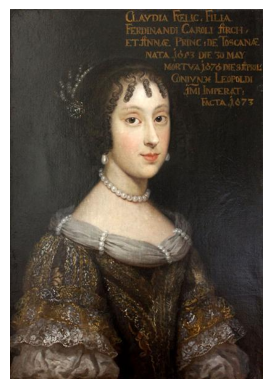

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(IMAGE_BASE_DIRECTORY + 'full/8a11bc996b61cad79491263a0ec188c0be20c6b2.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [32]:
import os

file_path = os.path.join(IMAGE_BASE_DIRECTORY, 'full', '9c388bb0a402a3fec366b7c15c530899dc40c14b.jpg')

if os.path.exists(file_path):
    size = os.path.getsize(file_path)
    print(f"File size: {size} bytes")
else:
    print("File does not exist.")

File size: 19265 bytes


In [33]:
IMAGE_BASE_DIRECTORY = 'drive/MyDrive/ScrapedWikiArtImages/img/'

In [34]:
# --- Function to delete orphaned files ---
def delete_orphaned_files(orphaned_file_paths, base_directory, log_only=True):
    """
    Deletes a list of orphaned files from the disk.

    Args:
        orphaned_file_paths (set or list): A collection of relative file paths
                                           (e.g., 'full/image.jpg') to be deleted.
                                           This comes from the `disk_orphans` output.
        base_directory (str): The base directory where these relative paths reside.
        log_only (bool): If True, only prints which files would be deleted without
                         actually deleting them. If False, performs deletion.
    """
    if not orphaned_file_paths:
        print("No orphaned files provided to delete.")
        return

    print(f"\n--- {'Logging Deletions (Log Only Mode)' if log_only else 'Attempting to Delete Orphaned Files'} ---")
    if not log_only:
        print("WARNING: PERMANENTLY DELETING FILES FROM DISK!")

    deleted_count = 0
    error_count = 0

    for rel_path in tqdm(list(orphaned_file_paths), desc="Processing files for deletion"):
        full_path = os.path.join(base_directory, rel_path)

        if log_only:
            if os.path.exists(full_path):
                print(f"[LOG ONLY] Would delete: {full_path}")
            else:
                print(f"[LOG ONLY] File already missing (or path incorrect): {full_path}")
        else: # Actual deletion
            try:
                if os.path.exists(full_path):
                    os.remove(full_path)
                    print(f"DELETED: {full_path}")
                    deleted_count += 1
                else:
                    print(f"File not found, cannot delete: {full_path}")
                    error_count +=1 # Count as an error if we expected to delete it
            except Exception as e:
                print(f"Error deleting file {full_path}: {e}")
                error_count += 1

    if log_only:
        print(f"\nLog only mode complete. {len(orphaned_file_paths)} files were logged for potential deletion.")
    else:
        print(f"\nDeletion process complete.")
        print(f"Successfully deleted: {deleted_count} files.")
        if error_count > 0:
            print(f"Errors encountered for: {error_count} files (e.g., not found, permission issues).")


In [39]:
if __name__ == "__main__":
     # --- 1. Load your DataFrame and run reconciliation (as you did) ---
    # disk_orphans_to_delete is already set by the previous reconciliation step

     # --- 2. Call the deletion function ---
    if disk_orphans:
        # FIRST, RUN WITH log_only=True to see what would be deleted:
        print("\n--- Running in LOG ONLY mode first ---")
        delete_orphaned_files(disk_orphans, IMAGE_BASE_DIRECTORY, log_only=True)

        # AFTER VERIFYING THE LOG, if you are sure, change log_only to False
        # For demonstration, let's proceed if the user confirms (in a real script)
        # For this example, we'll just show how to call it with log_only=False

        print("\n--- TO ACTUALLY DELETE, UNCOMMENT THE NEXT SECTION AND SET log_only=False ---")
        print("--- MAKE SURE YOU HAVE A BACKUP! ---")

        # Example of actual deletion call (use with extreme caution):
        confirm_deletion = input("Are you sure you want to delete the logged files? (yes/no): ")
        if confirm_deletion.lower() == 'yes':
            print("\n--- Running in ACTUAL DELETION mode ---")
            delete_orphaned_files(disk_orphans, IMAGE_BASE_DIRECTORY, log_only=False)
        else:
            print("Actual deletion cancelled.")

    else:
        print("The `disk_orphans` set is empty. No files to process for deletion.")


--- Running in LOG ONLY mode first ---

--- Logging Deletions (Log Only Mode) ---


Processing files for deletion:   0%|          | 0/896 [00:00<?, ?it/s]

[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/4618ff74ad1dade31ade5b84f1313a0580cb8e21.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/3919a6b4f95e40fc40db08dc15981ab86e232446.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/632f6e2d867e61334ae8d6e2f4326509f92aa615.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/a69b358dc2dbf77894cf76f3d88f53f42cbab3d8.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/a0a2e38e876a1d28cafca98df339ed9443d79c1f.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/e7dfe605f70d3312611405149b558abc54bfcd47.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/811cb9ae90d825abfcee223a22d738edc7b59288.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/1948b06e1eaf9eb668d30b98790a9505e9f335b1.jpg
[LOG ONLY] Would delete: drive/MyDrive/ScrapedWikiArtImages/img/full/945784ffbb1e186d828

Processing files for deletion:   0%|          | 0/896 [00:00<?, ?it/s]

DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/4618ff74ad1dade31ade5b84f1313a0580cb8e21.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/3919a6b4f95e40fc40db08dc15981ab86e232446.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/632f6e2d867e61334ae8d6e2f4326509f92aa615.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/a69b358dc2dbf77894cf76f3d88f53f42cbab3d8.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/a0a2e38e876a1d28cafca98df339ed9443d79c1f.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/e7dfe605f70d3312611405149b558abc54bfcd47.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/811cb9ae90d825abfcee223a22d738edc7b59288.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/1948b06e1eaf9eb668d30b98790a9505e9f335b1.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/945784ffbb1e186d82892e52b37b2ac266d13ed3.jpg
DELETED: drive/MyDrive/ScrapedWikiArtImages/img/full/171fee205cb0c23ef0663ac687b175a3e90b43ec.jpg
DELETED: drive/MyDri